In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [103]:
chatterbox = pd.read_csv("Train_Dataset.csv")
chatterbox.head()

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,...,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn,Unnamed: 20
0,1001,15.0,452,no,no,0.0,121.1,130.0,20.59,216.0,...,18.36,235.1,33.0,10.58,16.1,5.0,4.35,2.0,No,NaN
1,1002,105.0,452,no,no,0.0,259.3,96.0,44.08,175.2,...,14.89,222.4,36.0,10.01,12.0,5.0,3.24,3.0,No,NaN
2,1003,97.0,452,no,yes,32.0,183.4,94.0,31.18,269.1,...,22.87,203.5,38.0,9.16,6.7,4.0,1.81,5.0,No,NaN
3,1004,121.0,445,no,yes,35.0,68.7,95.0,11.68,209.2,...,17.78,197.4,42.0,8.88,11.4,4.0,3.08,1.0,No,NaN
4,1005,98.0,452,no,yes,22.0,278.3,89.0,47.31,93.4,...,7.94,107.6,42.0,4.84,9.7,5.0,2.62,0.0,No,NaN


In [104]:
chatterbox.drop('Unnamed: 20', axis=1, inplace=True)

In [105]:
print(chatterbox.dtypes)

customer_id                 int64
account_length            float64
location_code               int64
intertiol_plan             object
voice_mail_plan            object
number_vm_messages        float64
total_day_min             float64
total_day_calls           float64
total_day_charge          float64
total_eve_min             float64
total_eve_calls           float64
total_eve_charge          float64
total_night_minutes       float64
total_night_calls         float64
total_night_charge        float64
total_intl_minutes        float64
total_intl_calls          float64
total_intl_charge         float64
customer_service_calls    float64
Churn                      object
dtype: object


In [106]:
chatterbox.shape

(2321, 20)

In [107]:
chatterbox.columns

Index(['customer_id', 'account_length', 'location_code', 'intertiol_plan',
       'voice_mail_plan', 'number_vm_messages', 'total_day_min',
       'total_day_calls', 'total_day_charge', 'total_eve_min',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge', 'customer_service_calls',
       'Churn'],
      dtype='object')

In [108]:
subset = chatterbox.drop('Churn', axis=1).columns
chatterbox.shape

(2321, 20)

In [109]:
chatterbox.isna().sum()

customer_id               0
account_length            2
location_code             0
intertiol_plan            3
voice_mail_plan           6
number_vm_messages        3
total_day_min             1
total_day_calls           3
total_day_charge          5
total_eve_min             3
total_eve_calls           4
total_eve_charge          8
total_night_minutes       2
total_night_calls         5
total_night_charge        5
total_intl_minutes        2
total_intl_calls          3
total_intl_charge         5
customer_service_calls    1
Churn                     5
dtype: int64

In [110]:
chatterbox = chatterbox.dropna(subset = ['Churn'])

In [111]:
chatterbox.describe()

,customer_id,account_length,location_code,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
count,2316.000000,2314.000000,2316.000000,2313.000000,2315.000000,2313.000000,2311.000000,2313.000000,2312.000000,2308.000000,2314.000000,2311.000000,2311.000000,2314.00000,2313.000000,2311.000000,2315.000000
mean,2160.641192,101.347450,473.526339,7.573714,182.696285,105.337224,30.957590,203.548033,100.086073,17.125845,209.562705,87.634357,9.437594,10.24516,4.440553,2.772683,1.650540
std,669.954016,39.995885,42.039935,14.261062,73.382364,221.338132,9.834459,115.661156,20.518230,4.329073,408.495355,12.738802,18.675740,2.79590,2.461650,0.733607,1.429454
min,1001.000000,1.000000,445.000000,-202.000000,-179.900000,-1.000000,-25.600000,-103.300000,-80.000000,0.000000,23.200000,33.000000,1.040000,-9.30000,0.000000,0.000000,0.000000
25%,1580.750000,74.000000,445.000000,0.000000,144.000000,87.000000,24.480000,165.900000,87.000000,14.177500,167.425000,79.000000,7.535000,8.60000,3.000000,2.320000,1.000000
50%,2161.500000,101.000000,452.000000,0.000000,180.400000,102.000000,30.600000,202.500000,101.000000,17.220000,201.100000,90.000000,9.050000,10.30000,4.000000,2.780000,1.000000
75%,2740.250000,127.000000,452.000000,14.000000,220.950000,115.000000,37.580000,236.400000,114.000000,20.090000,235.000000,98.000000,10.580000,12.00000,6.000000,3.240000,2.000000
max,3321.000000,232.000000,547.000000,51.000000,2283.900000,10700.000000,60.960000,5186.400000,170.000000,30.830000,19700.000000,105.000000,900.150000,18.30000,20.000000,4.940000,9.000000


Account Length

In [112]:
chatterbox[chatterbox['account_length'] == 0]
# NaN values for account length could mean that the customer is new and has only been with the telco provider for less than 1 month

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn


In [113]:
chatterbox['account_length'] = chatterbox['account_length'].fillna(0)

International Plan

In [114]:
chatterbox[chatterbox['intertiol_plan'].isna()]
# is ther any significant relationship betn intertiol_plan and any other feature?

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn
728,1729,0.0,452,NaN,NaN,0.0,111.1,126.0,18.89,313.4,95.0,26.64,215.7,82.0,9.71,10.5,6.0,2.84,1.0,No
1186,2187,93.0,445,NaN,no,0.0,269.9,117.0,46.54,228.0,79.0,19.96,261.7,90.0,11.82,11.3,3.0,3.05,3.0,Yes
1328,2329,76.0,452,NaN,no,0.0,-171.1,78.0,29.09,257.2,NaN,21.86,91.6,92.0,4.12,16.2,3.0,4.37,1.0,No


In [115]:
mode_intl_plan = chatterbox['intertiol_plan'].mode()
print(mode_intl_plan)
chatterbox.loc[(chatterbox['intertiol_plan'].isna()), 'intertiol_plan'] = 'no'

0    no
dtype: object


Voicemail Plan

In [116]:
chatterbox[((chatterbox['voice_mail_plan'] == 'no') | (chatterbox['voice_mail_plan'].isna())) & (chatterbox['number_vm_messages'] != 0)]

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn
180,1181,24.0,445,no,NaN,NaN,151.0,70.0,25.33,126.0,87.0,11.14,224.6,67.0,NaN,8.6,2.0,2.32,2.0,Yes
654,1655,106.0,452,no,no,NaN,187.1,104.0,31.81,250.2,117.0,NaN,144.9,81.0,NaN,11.0,3.0,2.97,1.0,No
1338,2339,41.0,445,no,no,-202.0,202.9,97.0,34.49,153.8,104.0,13.07,113.5,92.0,5.11,9.0,3.0,2.43,3.0,No


In [117]:
chatterbox.loc[((chatterbox['voice_mail_plan'] == 'no') | (chatterbox['voice_mail_plan'].isna())) & (chatterbox['number_vm_messages'] != 0), 'number_vm_messages'] = 0.0

In [118]:
chatterbox.loc[(chatterbox['voice_mail_plan'].isna()) & (chatterbox['number_vm_messages'] == 0), 'voice_mail_plan'] = 'no'

In [119]:
chatterbox.loc[(chatterbox['voice_mail_plan'] == 'yes') & (chatterbox['number_vm_messages'].isna()), 'number_vm_messages'] = 0

Day Calls

In [120]:
chatterbox[(chatterbox['total_day_min'].isna()) | (chatterbox['total_day_min']<0)]

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn
1118,2119,120.0,445,yes,no,0.0,-179.9,72.0,NaN,170.0,98.0,NaN,190.6,89.0,8.58,13.8,2.0,3.73,1.0,Yes
1132,2133,98.0,452,no,no,0.0,-12.0,-1.0,-1.00,157.6,126.0,12.57,155.1,89.0,7.52,6.8,2.0,1.84,4.0,Yes
1328,2329,76.0,452,no,no,0.0,-171.1,78.0,29.09,257.2,NaN,21.86,91.6,92.0,4.12,16.2,3.0,4.37,1.0,No
1882,2883,126.0,452,no,no,0.0,NaN,102.0,38.88,168.7,99.0,NaN,223.5,100.0,10.06,11.8,4.0,3.19,1.0,No
2090,3091,60.0,445,no,no,0.0,-135.4,134.0,23.02,205.9,85.0,NaN,204.0,103.0,9.18,7.9,4.0,2.13,1.0,No


In [121]:
chatterbox[(chatterbox['total_day_charge'].isna()) | (chatterbox['total_day_charge']<0)]

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn
298,1299,106.0,445,no,yes,29.0,83.6,131.0,NaN,203.9,131.0,NaN,229.5,73.0,10.33,NaN,3.0,2.19,1.0,No
525,1526,85.0,452,no,no,0.0,236.9,93.0,NaN,197.7,113.0,16.80,309.1,78.0,13.91,11.4,7.0,3.08,2.0,Yes
1118,2119,120.0,445,yes,no,0.0,-179.9,72.0,NaN,170.0,98.0,NaN,190.6,89.0,8.58,13.8,2.0,3.73,1.0,Yes
1132,2133,98.0,452,no,no,0.0,-12.0,-1.0,-1.0,157.6,126.0,12.57,155.1,89.0,7.52,6.8,2.0,1.84,4.0,Yes
1767,2768,32.0,445,no,yes,26.0,266.7,109.0,NaN,232.3,107.0,19.75,212.8,98.0,9.58,16.3,4.0,4.40,1.0,No
1887,2888,122.0,445,no,no,0.0,231.2,141.0,NaN,267.8,136.0,22.76,240.3,NaN,10.81,8.8,5.0,2.38,1.0,Yes
2200,3201,75.0,452,no,no,0.0,150.6,99.0,-25.6,301.5,83.0,25.63,158.7,NaN,7.14,8.1,5.0,2.19,0.0,No


In [122]:
chatterbox['total_day_min'] = np.abs(chatterbox['total_day_min'])
chatterbox['total_day_charge'] = np.abs(chatterbox['total_day_charge'])

In [123]:
charge_per_min_day = np.mean(chatterbox['total_day_charge']/chatterbox['total_day_min'])
print(charge_per_min_day)

0.17002034159943122


In [124]:
chatterbox.loc[chatterbox['total_day_min'].isna(), 'total_day_min'] = chatterbox['total_day_charge']/charge_per_min_day

In [125]:
chatterbox.loc[chatterbox['total_day_charge'].isna(), 'total_day_charge'] = chatterbox['total_day_min']*charge_per_min_day

In [126]:
chatterbox[(chatterbox['total_day_calls'].isna()) | (chatterbox['total_day_calls']<0)]

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn
647,1648,160.0,452,no,no,0.0,256.0,NaN,43.52,187.4,61.0,15.93,NaN,81.0,5.36,11.5,4.0,3.11,3.0,No
1131,2132,111.0,547,no,no,0.0,179.9,NaN,29.07,106.8,58.0,9.74,209.7,89.0,9.62,10.5,NaN,NaN,4.0,Yes
1132,2133,98.0,452,no,no,0.0,12.0,-1.0,1.00,157.6,126.0,12.57,155.1,89.0,7.52,6.8,2.0,1.84,4.0,Yes
1907,2908,164.0,547,no,no,0.0,192.1,NaN,32.66,249.8,94.0,21.23,132.6,100.0,5.97,7.3,3.0,1.97,3.0,No


In [127]:
chatterbox['total_day_calls'] = np.abs(chatterbox['total_day_calls'])

In [128]:
avg_call_dur = np.mean(chatterbox['total_day_min']/chatterbox['total_day_calls'])
print(avg_call_dur)

1.909422355563901


In [129]:
chatterbox.loc[chatterbox['total_day_calls'].isna(), 'total_day_calls'] = np.round(chatterbox['total_day_min']/avg_call_dur, 0)

In [130]:
chatterbox.head()

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn
0,1001,15.0,452,no,no,0.0,121.1,130.0,20.59,216.0,86.0,18.36,235.1,33.0,10.58,16.1,5.0,4.35,2.0,No
1,1002,105.0,452,no,no,0.0,259.3,96.0,44.08,175.2,97.0,14.89,222.4,36.0,10.01,12.0,5.0,3.24,3.0,No
2,1003,97.0,452,no,yes,32.0,183.4,94.0,31.18,269.1,120.0,22.87,203.5,38.0,9.16,6.7,4.0,1.81,5.0,No
3,1004,121.0,445,no,yes,35.0,68.7,95.0,11.68,209.2,69.0,17.78,197.4,42.0,8.88,11.4,4.0,3.08,1.0,No
4,1005,98.0,452,no,yes,22.0,278.3,89.0,47.31,93.4,143.0,7.94,107.6,42.0,4.84,9.7,5.0,2.62,0.0,No


Evening Calls

In [131]:
chatterbox[(chatterbox['total_eve_min'].isna()) | (chatterbox['total_eve_min']<0)]

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn
312,1313,59.0,445,no,yes,27.0,127.4,110.0,21.66,-103.3,99.0,8.78,164.2,73.0,7.39,9.1,3.0,2.46,0.0,No
492,1493,125.0,452,no,no,0.0,140.1,132.0,23.82,NaN,126.0,17.82,264.1,NaN,11.88,8.0,2.0,2.16,1.0,No
790,1791,112.0,452,no,no,0.0,120.9,98.0,19.02,NaN,139.0,10.69,143.8,83.0,6.61,14.1,4.0,3.81,5.0,Yes
1109,2110,89.0,547,no,no,0.0,303.9,95.0,51.66,NaN,114.0,22.18,312.1,89.0,14.04,5.3,3.0,1.43,1.0,Yes


In [132]:
chatterbox[(chatterbox['total_eve_charge'].isna()) | (chatterbox['total_eve_charge']<0)]

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn
11,1012,61.0,445,no,yes,31.0,288.700000,101.0,49.080000,203.8,102.0,NaN,203.2,49.0,9.14,8.6,3.0,2.32,0.0,No
298,1299,106.0,445,no,yes,29.0,83.600000,131.0,14.213701,203.9,131.0,NaN,229.5,73.0,10.33,NaN,3.0,2.19,1.0,No
654,1655,106.0,452,no,no,0.0,187.100000,104.0,31.810000,250.2,117.0,NaN,144.9,81.0,NaN,11.0,3.0,2.97,1.0,No
1118,2119,120.0,445,yes,no,0.0,179.900000,72.0,30.586659,170.0,98.0,NaN,190.6,89.0,8.58,13.8,2.0,3.73,1.0,Yes
1379,2380,101.0,445,no,no,0.0,239.000000,156.0,40.630000,273.0,106.0,NaN,278.2,93.0,12.52,13.5,8.0,3.65,1.0,Yes
1447,2448,184.0,452,no,no,0.0,236.400000,73.0,40.190000,287.3,120.0,NaN,192.0,94.0,8.64,13.8,4.0,3.73,1.0,Yes
1882,2883,126.0,452,no,no,0.0,228.678519,102.0,38.880000,168.7,99.0,NaN,223.5,100.0,10.06,11.8,4.0,3.19,1.0,No
2090,3091,60.0,445,no,no,0.0,135.400000,134.0,23.020000,205.9,85.0,NaN,204.0,103.0,9.18,7.9,4.0,2.13,1.0,No


In [133]:
chatterbox['total_eve_min'] = np.abs(chatterbox['total_eve_min'])

In [134]:
charge_per_min_eve = np.mean(chatterbox['total_eve_charge']/chatterbox['total_eve_min'])
print(charge_per_min_eve)

0.08503324873874801


In [135]:
chatterbox.loc[chatterbox['total_eve_min'].isna(), 'total_eve_min'] = chatterbox['total_eve_charge']/charge_per_min_eve

In [136]:
chatterbox.loc[chatterbox['total_eve_charge'].isna(), 'total_eve_charge'] = chatterbox['total_eve_min']*charge_per_min_eve

In [137]:
chatterbox[(chatterbox['total_eve_calls'].isna()) | (chatterbox['total_eve_calls']<0)]

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn
678,1679,156.0,547,no,no,0.0,123.7,96.0,21.03,103.0,-80.0,8.76,189.4,82.0,NaN,13.1,4.0,3.54,1.0,No
803,1804,87.0,452,no,no,0.0,240.0,83.0,40.80,134.1,NaN,11.40,189.1,84.0,8.51,9.3,2.0,2.51,0.0,Yes
900,1901,80.0,445,no,no,0.0,118.1,90.0,20.08,144.3,-77.0,12.27,225.1,86.0,10.13,-8.2,6.0,2.21,1.0,No
1328,2329,76.0,452,no,no,0.0,171.1,78.0,29.09,257.2,NaN,21.86,91.6,92.0,4.12,16.2,3.0,4.37,1.0,No
1365,2366,98.0,547,yes,no,0.0,158.4,71.0,26.93,306.6,NaN,26.06,144.2,93.0,6.49,2.1,4.0,0.57,1.0,No
2037,3038,160.0,452,no,no,0.0,206.3,66.0,35.07,241.1,NaN,20.49,227.8,102.0,10.25,11.7,6.0,3.16,0.0,No


In [138]:
chatterbox['total_eve_calls'] = np.abs(chatterbox['total_eve_calls'])

In [139]:
avg_call_dur_eve = np.mean(chatterbox['total_eve_min']/chatterbox['total_eve_calls'])
print(avg_call_dur_eve)

2.1244250130699114


In [140]:
chatterbox.loc[chatterbox['total_eve_calls'].isna(), 'total_eve_calls'] = np.round(chatterbox['total_eve_min']/avg_call_dur_eve, 0)

Night Calls

In [141]:
chatterbox[(chatterbox['total_night_minutes'].isna()) | (chatterbox['total_night_minutes']<0)]

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn
324,1325,103.0,547,no,no,0.0,167.8,121.0,28.53,212.9,123.0,18.10,NaN,73.0,9.37,13.0,3.0,3.51,5.0,No
647,1648,160.0,452,no,no,0.0,256.0,134.0,43.52,187.4,61.0,15.93,NaN,81.0,5.36,11.5,4.0,3.11,3.0,No


In [142]:
chatterbox[(chatterbox['total_night_charge'].isna()) | (chatterbox['total_night_charge']<0)]

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn
180,1181,24.0,445,no,no,0.0,151.0,70.0,25.33,126.0,87.0,11.140000,224.6,67.0,NaN,8.6,2.0,2.32,2.0,Yes
579,1580,97.0,452,no,yes,24.0,133.2,135.0,22.64,217.2,58.0,18.460000,70.6,79.0,NaN,11.0,3.0,2.97,1.0,No
618,1619,59.0,547,no,no,0.0,155.2,79.0,26.38,235.3,123.0,20.000000,169.4,80.0,NaN,8.7,4.0,2.35,NaN,No
654,1655,106.0,452,no,no,0.0,187.1,104.0,31.81,250.2,117.0,21.275319,144.9,81.0,NaN,11.0,3.0,2.97,1.0,No
678,1679,156.0,547,no,no,0.0,123.7,96.0,21.03,103.0,80.0,8.760000,189.4,82.0,NaN,13.1,4.0,3.54,1.0,No


In [143]:
charge_per_min_night = np.mean(chatterbox['total_night_charge']/chatterbox['total_night_minutes'])
print(charge_per_min_night)

0.0468773251071267


In [144]:
chatterbox.loc[chatterbox['total_night_minutes'].isna(), 'total_night_minutes'] = chatterbox['total_night_charge']/charge_per_min_night

In [145]:
chatterbox.loc[chatterbox['total_night_charge'].isna(), 'total_night_charge'] = chatterbox['total_night_minutes']*charge_per_min_night

In [146]:
chatterbox[(chatterbox['total_night_calls'].isna()) | (chatterbox['total_night_calls']<0)]

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn
339,1340,89.0,452,no,yes,35.0,174.4,108.0,29.650000,196.700000,100.0,16.72,127.4,NaN,5.73,11.8,3.0,NaN,1.0,No
492,1493,125.0,452,no,no,0.0,140.1,132.0,23.820000,209.565085,126.0,17.82,264.1,NaN,11.88,8.0,2.0,2.16,1.0,No
1128,2129,77.0,452,no,no,0.0,252.2,86.0,41.680000,252.100000,80.0,22.60,235.4,NaN,10.77,-7.5,3.0,2.03,0.0,Yes
1887,2888,122.0,445,no,no,0.0,231.2,141.0,39.308703,267.800000,136.0,22.76,240.3,NaN,10.81,8.8,5.0,2.38,1.0,Yes
2200,3201,75.0,452,no,no,0.0,150.6,99.0,25.600000,301.500000,83.0,25.63,158.7,NaN,7.14,8.1,5.0,2.19,0.0,No


In [147]:
avg_call_dur_night = np.mean(chatterbox['total_night_minutes']/chatterbox['total_night_calls'])
print(avg_call_dur_night)

2.449969942010788


In [148]:
chatterbox.loc[chatterbox['total_night_calls'].isna(), 'total_night_calls'] = np.round(chatterbox['total_night_minutes']/avg_call_dur_night, 0)

In [149]:
chatterbox['total_night_calls'].unique()

array([ 33.,  36.,  38.,  42.,  44.,  46.,  47.,  48.,  49.,  50.,  51.,
        52.,  53.,  54.,  55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,
        63.,  64.,  65.,  66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,
        74.,  75.,  76.,  77., 108.,  78.,  79.,  80.,  81.,  84.,  82.,
        83.,  85.,  86.,  87.,  88.,  89.,  96.,  90.,  91.,  92.,  93.,
        94.,  95.,  97.,  98.,  99., 100., 101., 102., 103., 104., 105.])

International Calls

In [150]:
chatterbox[(chatterbox['total_intl_minutes'].isna()) | (chatterbox['total_intl_minutes']<0)]

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn
195,1196,96.0,452,no,no,0.0,160.2,117.0,27.230000,267.5,67.0,22.740000,228.5,68.0,10.28,-9.3,5.0,2.51,2.0,No
298,1299,106.0,445,no,yes,29.0,83.6,131.0,14.213701,203.9,131.0,17.338279,229.5,73.0,10.33,NaN,3.0,2.19,1.0,No
789,1790,60.0,445,yes,yes,29.0,279.9,107.0,43.200000,218.8,91.0,19.340000,121.1,83.0,4.86,NaN,13.0,3.78,0.0,Yes
900,1901,80.0,445,no,no,0.0,118.1,90.0,20.080000,144.3,77.0,12.270000,225.1,86.0,10.13,-8.2,6.0,2.21,1.0,No
1128,2129,77.0,452,no,no,0.0,252.2,86.0,41.680000,252.1,80.0,22.600000,235.4,96.0,10.77,-7.5,3.0,2.03,0.0,Yes


In [151]:
chatterbox[(chatterbox['total_intl_charge'].isna()) | (chatterbox['total_intl_charge']<0)]

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn
339,1340,89.0,452,no,yes,35.0,174.4,108.0,29.65,196.7,100.0,16.72,127.4,52.0,5.73,11.8,3.0,NaN,1.0,No
1131,2132,111.0,547,no,no,0.0,179.9,94.0,29.07,106.8,58.0,9.74,209.7,89.0,9.62,10.5,NaN,NaN,4.0,Yes
1886,2887,154.0,445,no,yes,35.0,224.0,102.0,38.08,192.0,99.0,16.32,163.1,100.0,7.34,9.6,2.0,NaN,0.0,No
2004,3005,166.0,452,no,no,0.0,220.7,106.0,37.52,177.8,118.0,15.11,206.1,102.0,9.27,12.4,9.0,NaN,1.0,No
2072,3073,141.0,547,no,yes,28.0,308.0,123.0,52.36,247.8,128.0,21.06,152.9,103.0,6.88,7.4,3.0,NaN,1.0,No


In [152]:
chatterbox['total_intl_minutes'] = np.abs(chatterbox['total_intl_minutes'])

In [153]:
charge_per_min_intl = np.mean(chatterbox['total_intl_charge']/chatterbox['total_intl_minutes'])
print(charge_per_min_intl)

0.27005853779392947


In [154]:
chatterbox.loc[chatterbox['total_intl_minutes'].isna(), 'total_intl_minutes'] = chatterbox['total_intl_charge']/charge_per_min_intl

In [155]:
chatterbox.loc[chatterbox['total_intl_charge'].isna(), 'total_intl_charge'] = chatterbox['total_intl_minutes']*charge_per_min_intl

In [156]:
chatterbox[(chatterbox['total_intl_calls'].isna()) | (chatterbox['total_intl_calls']<0)]

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn
93,1094,44.0,452,no,yes,34.0,221.8,105.0,37.71,161.7,85.0,13.74,227.7,62.0,10.25,14.0,NaN,3.780000,0.0,No
522,1523,58.0,547,no,no,0.0,112.2,95.0,19.07,209.6,108.0,17.82,260.9,78.0,11.74,13.9,NaN,3.750000,0.0,Yes
1131,2132,111.0,547,no,no,0.0,179.9,94.0,29.07,106.8,58.0,9.74,209.7,89.0,9.62,10.5,NaN,2.835615,4.0,Yes


In [157]:
intl_calls = chatterbox[(chatterbox['total_intl_calls']>0)]
avg_call_dur_intl = np.mean(intl_calls['total_intl_minutes']/intl_calls['total_intl_calls'])
print(avg_call_dur_intl)

3.1623282837770543


In [158]:
chatterbox.loc[chatterbox['total_intl_calls'].isna(), 'total_intl_calls'] = np.round(chatterbox['total_intl_minutes']/avg_call_dur_intl, 0)

In [159]:
chatterbox[(chatterbox['total_intl_minutes']>0) & (chatterbox['total_intl_calls'] == 0)]

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn
839,1840,147.0,445,no,no,0.0,290.0,89.0,47.58,239.8,86.0,20.70,283.6,84.0,12.76,6.2,0.0,1.67,0.0,Yes
1018,2019,119.0,445,no,no,0.0,287.1,118.0,50.81,165.3,99.0,12.54,218.8,87.0,9.76,13.9,0.0,3.75,2.0,Yes
1701,2702,17.0,547,no,yes,31.0,150.1,123.0,27.03,199.9,57.0,16.80,232.3,97.0,10.09,10.0,0.0,2.70,6.0,Yes
1844,2845,82.0,452,no,no,0.0,165.1,76.0,28.41,138.8,81.0,12.20,188.4,99.0,8.43,9.4,0.0,2.54,6.0,Yes
1917,2918,151.0,452,yes,no,0.0,218.0,59.0,39.06,119.4,94.0,8.72,273.2,100.0,12.11,12.4,0.0,3.35,0.0,Yes
2071,3072,90.0,452,yes,no,0.0,136.2,91.0,24.19,223.4,108.0,19.73,139.2,102.0,6.04,9.2,0.0,2.48,4.0,Yes


In [160]:
chatterbox.loc[chatterbox['total_intl_calls']==0, ['total_intl_minutes', 'total_intl_charge']] = 0.0
# chatterbox.loc[chatterbox['total_intl_calls']==0, 'total_intl_charge'] = 0.0

In [161]:
chatterbox[chatterbox['customer_service_calls'].isna()]

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn
618,1619,59.0,547,no,no,0.0,155.2,79.0,26.38,235.3,123.0,20.0,169.4,80.0,7.941019,8.7,4.0,2.35,NaN,No


In [162]:
chatterbox.loc[chatterbox['customer_service_calls'].isna(), 'customer_service_calls'] = 0

In [163]:
chatterbox['customer_service_calls'].unique()

array([2., 3., 5., 1., 0., 4., 6., 7., 9., 8.])

In [164]:
chatterbox.isna().sum()

customer_id               0
account_length            0
location_code             0
intertiol_plan            0
voice_mail_plan           0
number_vm_messages        0
total_day_min             0
total_day_calls           0
total_day_charge          0
total_eve_min             0
total_eve_calls           0
total_eve_charge          0
total_night_minutes       0
total_night_calls         0
total_night_charge        0
total_intl_minutes        0
total_intl_calls          0
total_intl_charge         0
customer_service_calls    0
Churn                     0
dtype: int64

In [165]:
chatterbox.describe()

,customer_id,account_length,location_code,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
count,2316.000000,2316.000000,2316.000000,2316.000000,2316.000000,2316.000000,2316.000000,2316.000000,2316.000000,2316.000000,2316.000000,2316.000000,2316.00000,2316.000000,2316.000000,2316.000000,2316.000000
mean,2160.641192,101.259931,473.526339,7.651123,183.146536,105.343696,30.987013,203.630967,100.239206,17.131410,209.517411,87.626079,9.43339,10.241065,4.439551,2.765605,1.649827
std,669.954016,40.089336,42.039935,13.573321,72.291244,221.195205,9.765358,115.446436,19.869178,4.327712,408.323705,12.765271,18.65612,2.762639,2.460271,0.745814,1.429557
min,1001.000000,0.000000,445.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.04000,0.000000,0.000000,0.000000,0.000000
25%,1580.750000,74.000000,445.000000,0.000000,144.175000,87.000000,24.495000,165.900000,87.000000,14.187500,167.375000,79.000000,7.53000,8.600000,3.000000,2.320000,1.000000
50%,2161.500000,101.000000,452.000000,0.000000,180.450000,102.000000,30.600000,202.500000,101.000000,17.220000,201.050000,90.000000,9.05000,10.300000,4.000000,2.780000,1.000000
75%,2740.250000,127.000000,452.000000,14.000000,221.000000,115.000000,37.592500,236.425000,114.000000,20.090000,235.000000,98.000000,10.58000,12.000000,6.000000,3.240000,2.000000
max,3321.000000,232.000000,547.000000,51.000000,2283.900000,10700.000000,60.960000,5186.400000,170.000000,30.830000,19700.000000,108.000000,900.15000,18.300000,20.000000,4.940000,9.000000


In [166]:
chatterbox['location_code'].unique()

array([452, 445, 547])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


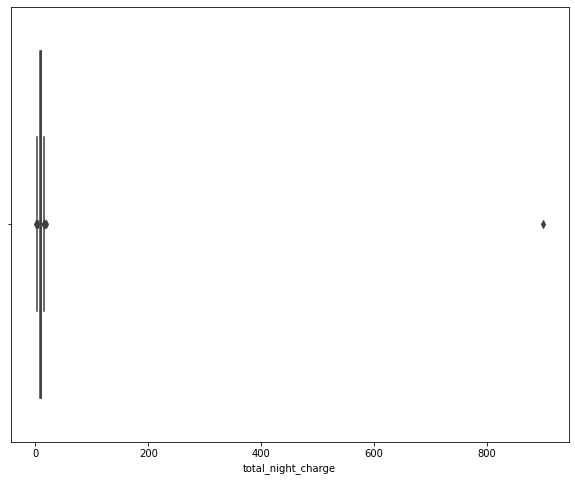

In [167]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(chatterbox['total_night_charge'])

In [168]:
chatterbox.loc[chatterbox['total_night_charge'] == 900.15, 'total_night_charge'] = chatterbox['total_night_minutes']*charge_per_min_night

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


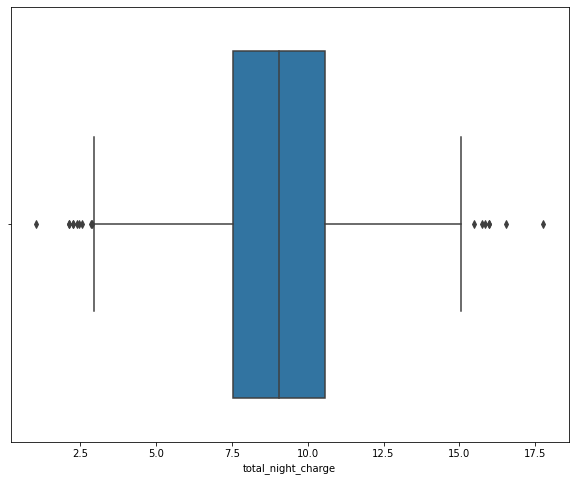

In [169]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(chatterbox['total_night_charge'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


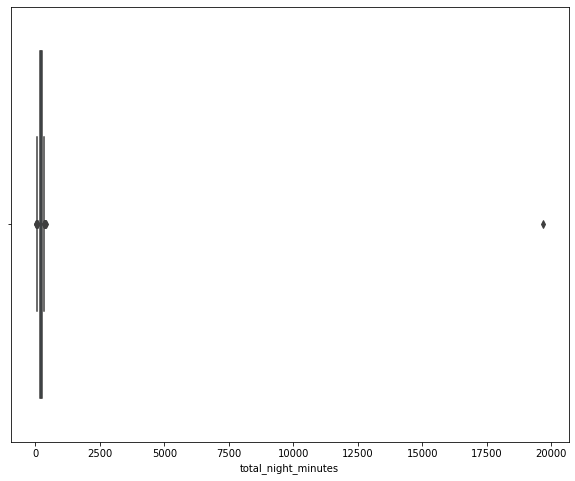

In [170]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(chatterbox['total_night_minutes'])

In [171]:
chatterbox.loc[chatterbox['total_night_minutes']==19700, 'total_night_minutes'] = chatterbox['total_night_charge']/charge_per_min_night
# chatterbox[chatterbox['total_night_minutes'] == 19700]

In [172]:
chatterbox.loc[chatterbox['total_eve_min']==5186.4, 'total_eve_min'] = chatterbox['total_eve_charge']/charge_per_min_eve
# chatterbox[chatterbox['total_eve_min'] == 5186.4]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


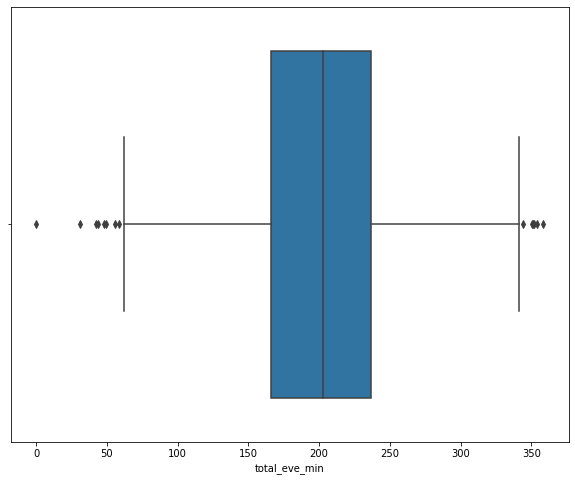

In [173]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(chatterbox['total_eve_min'])

In [174]:
chatterbox.loc[chatterbox['total_day_calls']==10700, 'total_day_calls'] = chatterbox['total_day_min']/avg_call_dur
# chatterbox[chatterbox['total_day_calls'] == 10700]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


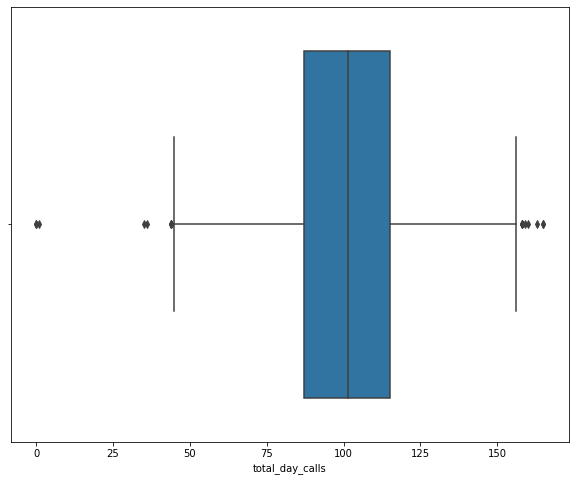

In [175]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(chatterbox['total_day_calls'])

In [176]:
chatterbox.loc[chatterbox['total_day_min']==2283.9, 'total_day_min'] = chatterbox['total_day_charge']/charge_per_min_day

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


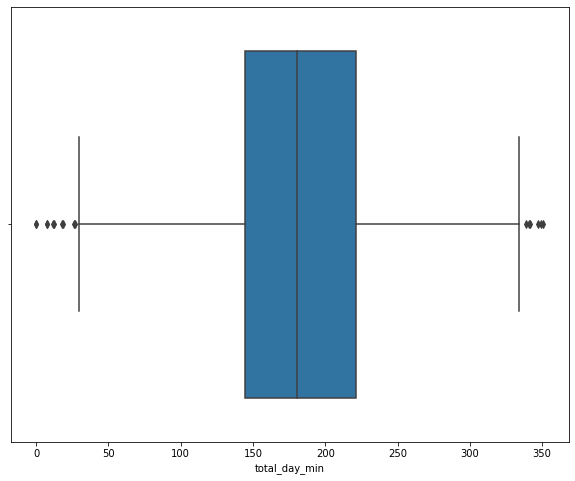

In [177]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(chatterbox['total_day_min'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


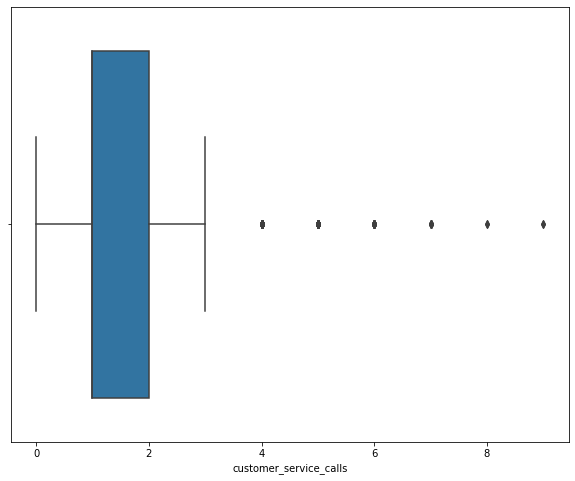

In [178]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(chatterbox['customer_service_calls'])

In [179]:
chatterbox.to_csv("preprocessed_train.csv", index=False)